In [1]:
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [8]:
# add to stop words
STOPWORDS.update(["child", "want", "year", "Singapore",'life', 'co', "related", "B", "gd", "one", "live", "|", "t", "using", "s", "https", "day", "work", "reader", "stop", "ltd", "think", "buy", "moving", "focuses", "dm", "open", "ing", "W", "downloads", "peer", "thank", "joshua", "aim", "etc", "enough", "seeker", "isaiah", "twitter", "good", "benjamin", "eyed", "east", "right", "world", "books", "social", "follower", "follow", "believe", "love", "view", "book" "todo", "always", "part", "future", "full", "jesu", "living", "every", "find", "free", "live"])

In [9]:
# import .csv
df = pd.read_csv("twitter_followers_cleaned_bio.csv", index_col=0)

In [10]:
text = " ".join(bio for bio in df["bio"])
text = re.sub(r'==.*?==+', '', text)
text = re.sub(r'[^a-zA-Z]', ' ', text)
text = text.replace('\n', '')

print(len(text))

7521


In [11]:
import nltk
# nltk.download('averaged_perceptron_tagger')

# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

# print(nouns)

all_nouns = ""

for word in nouns:
    all_nouns += word + " "

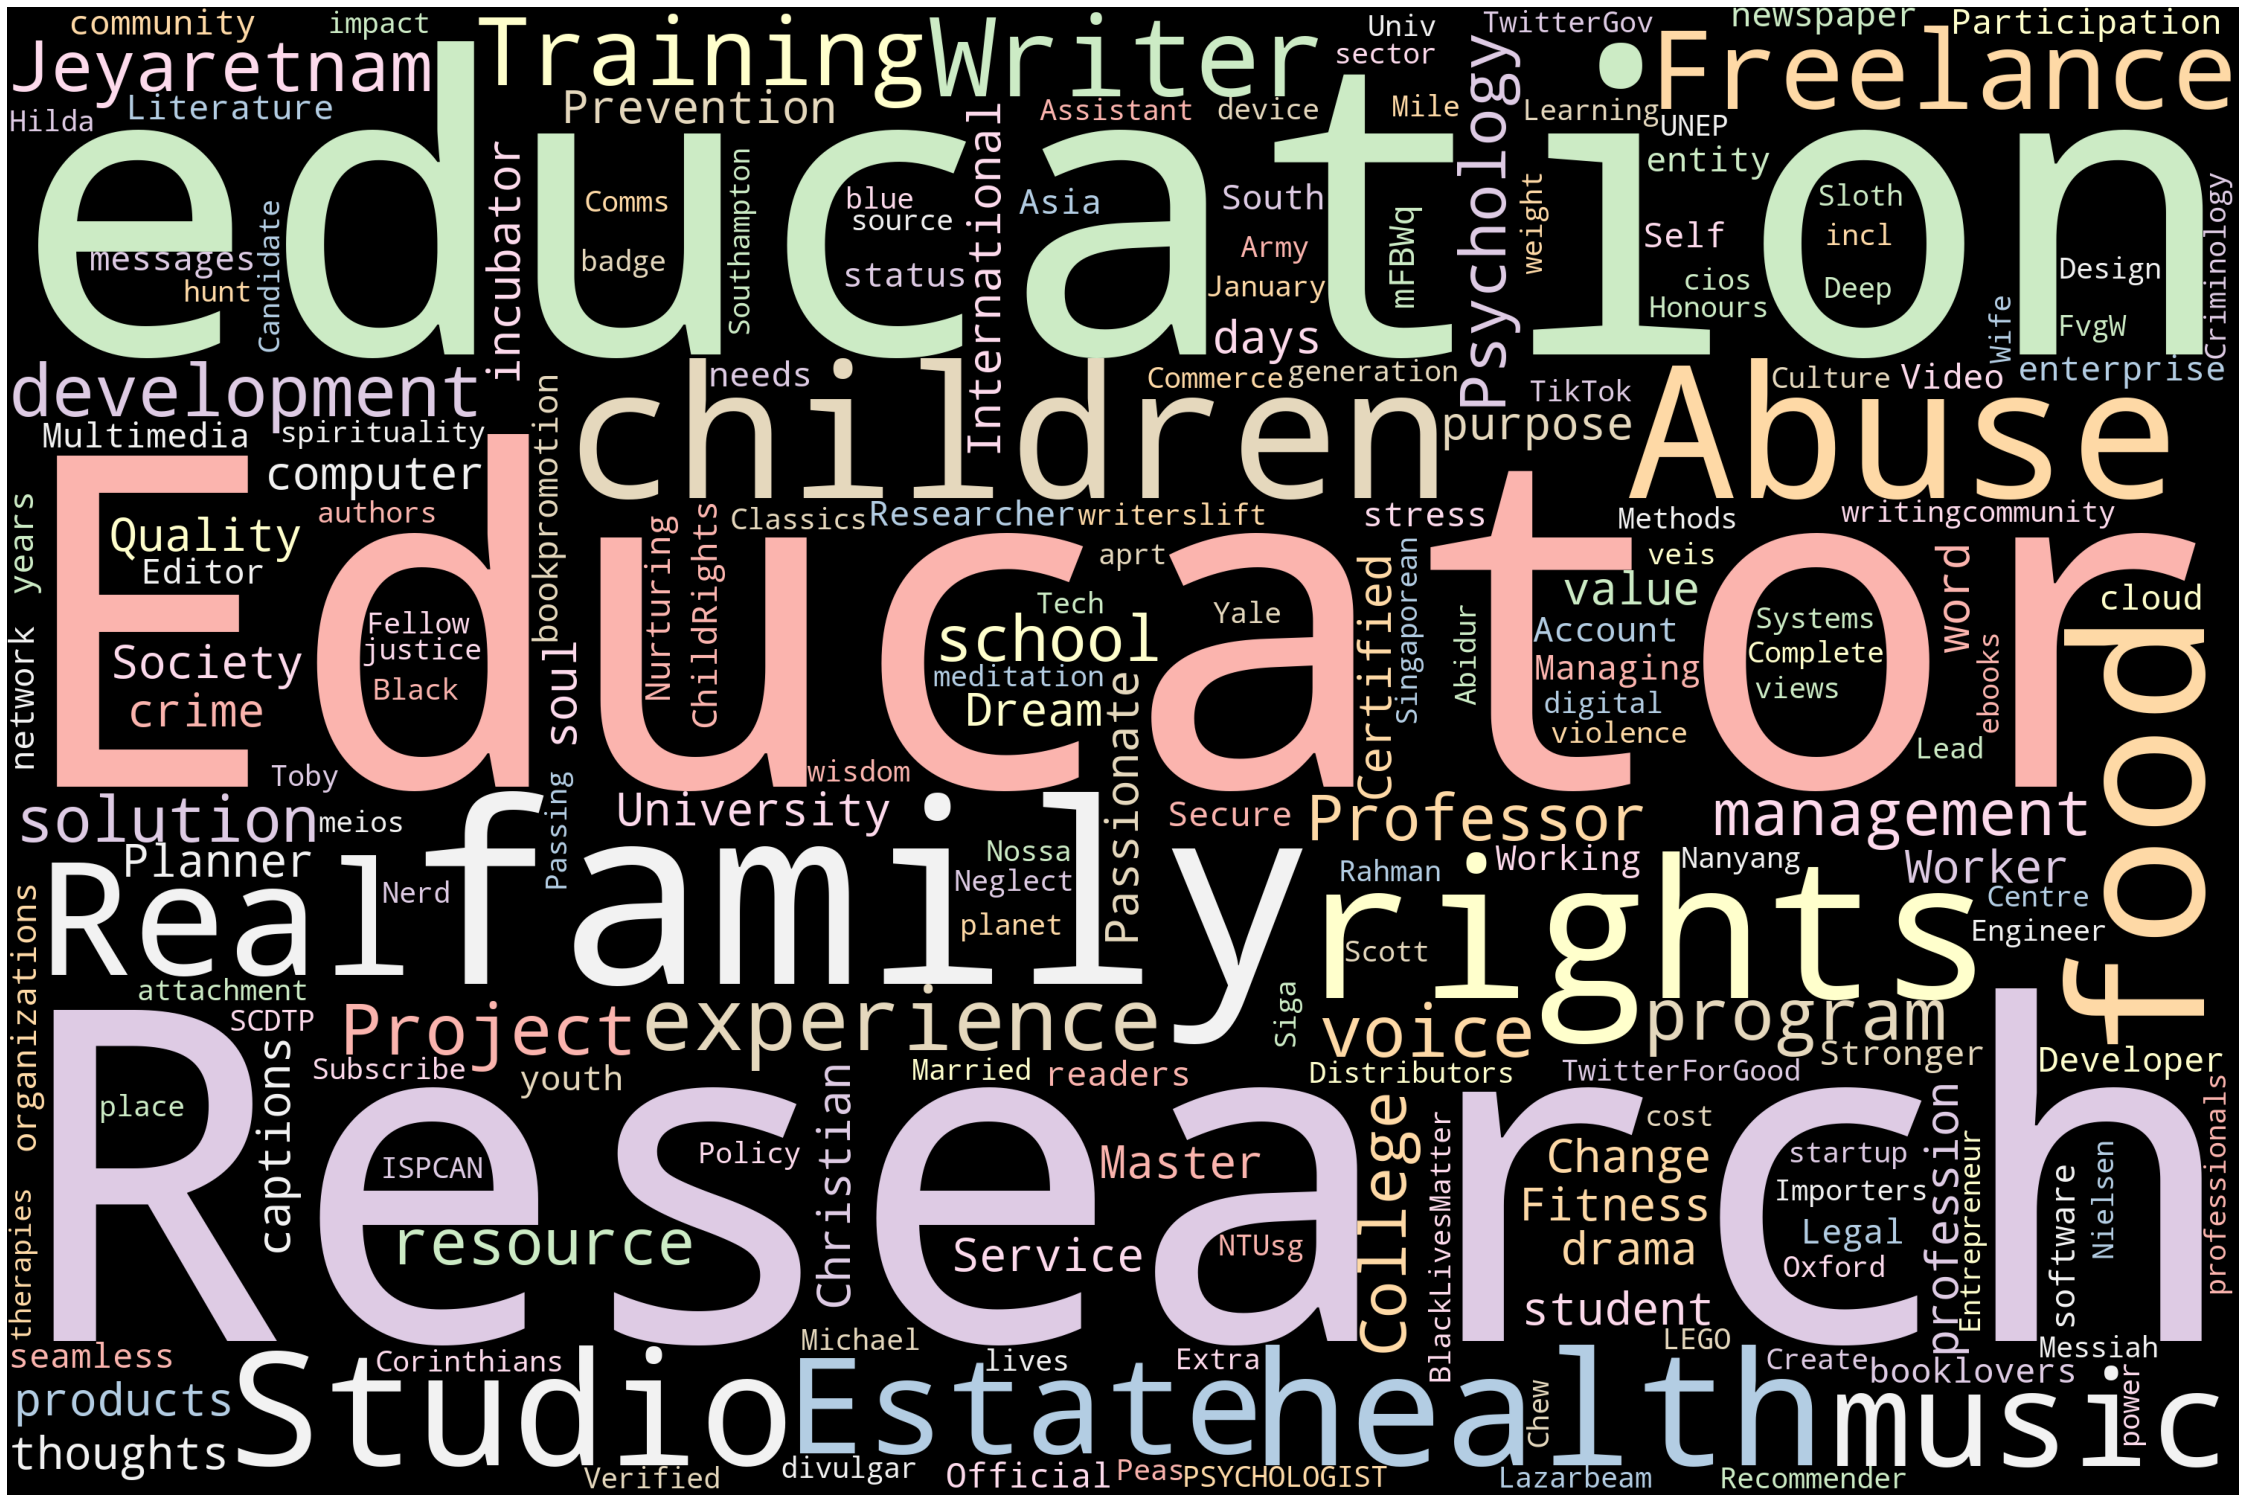

In [13]:
# Generate word cloud
noun_wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', min_word_length=4, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_nouns)
# Plot
plot_cloud(noun_wordcloud)

In [16]:
# create a dictionary of word frequencies
noun_dictionary = noun_wordcloud.process_text(all_nouns)
# sort the dictionary
word_freq={k: v for k, v in sorted(noun_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=noun_wordcloud.words_

#print results
print("Top 10 Words by Frequency")
for i, word in enumerate(list(word_freq.items())[:20]):
    print(f"{i+1}. {word[0]}")
    
print()    
print("Top 10 Words by Relative Frequency")
for i, word in enumerate(list(rel_freq.items())[:10]):
    print(f"{i+1}. {word}")

Top 10 Words by Frequency
1. Educator
2. Research
3. education
4. family
5. rights
6. children
7. food
8. Abuse
9. health
10. Studio
11. Real
12. Estate
13. music
14. Writer
15. Freelance
16. Training
17. experience
18. development
19. program
20. voice

Top 10 Words by Relative Frequency
1. ('Educator', 1.0)
2. ('Research', 1.0)
3. ('education', 1.0)
4. ('family', 1.0)
5. ('rights', 0.75)
6. ('children', 0.75)
7. ('food', 0.75)
8. ('Abuse', 0.75)
9. ('health', 0.75)
10. ('Studio', 0.75)


In [9]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print("Top 10 Words by Frequency")
for i, word in enumerate(list(word_freq.items())[:10]):
    print(f"{i+1}. {word}")
    
print()    
print("Top 10 Words by Relative Frequency")
for i, word in enumerate(list(rel_freq.items())[:10]):
    print(f"{i+1}. {word}")

NameError: name 'wordcloud' is not defined

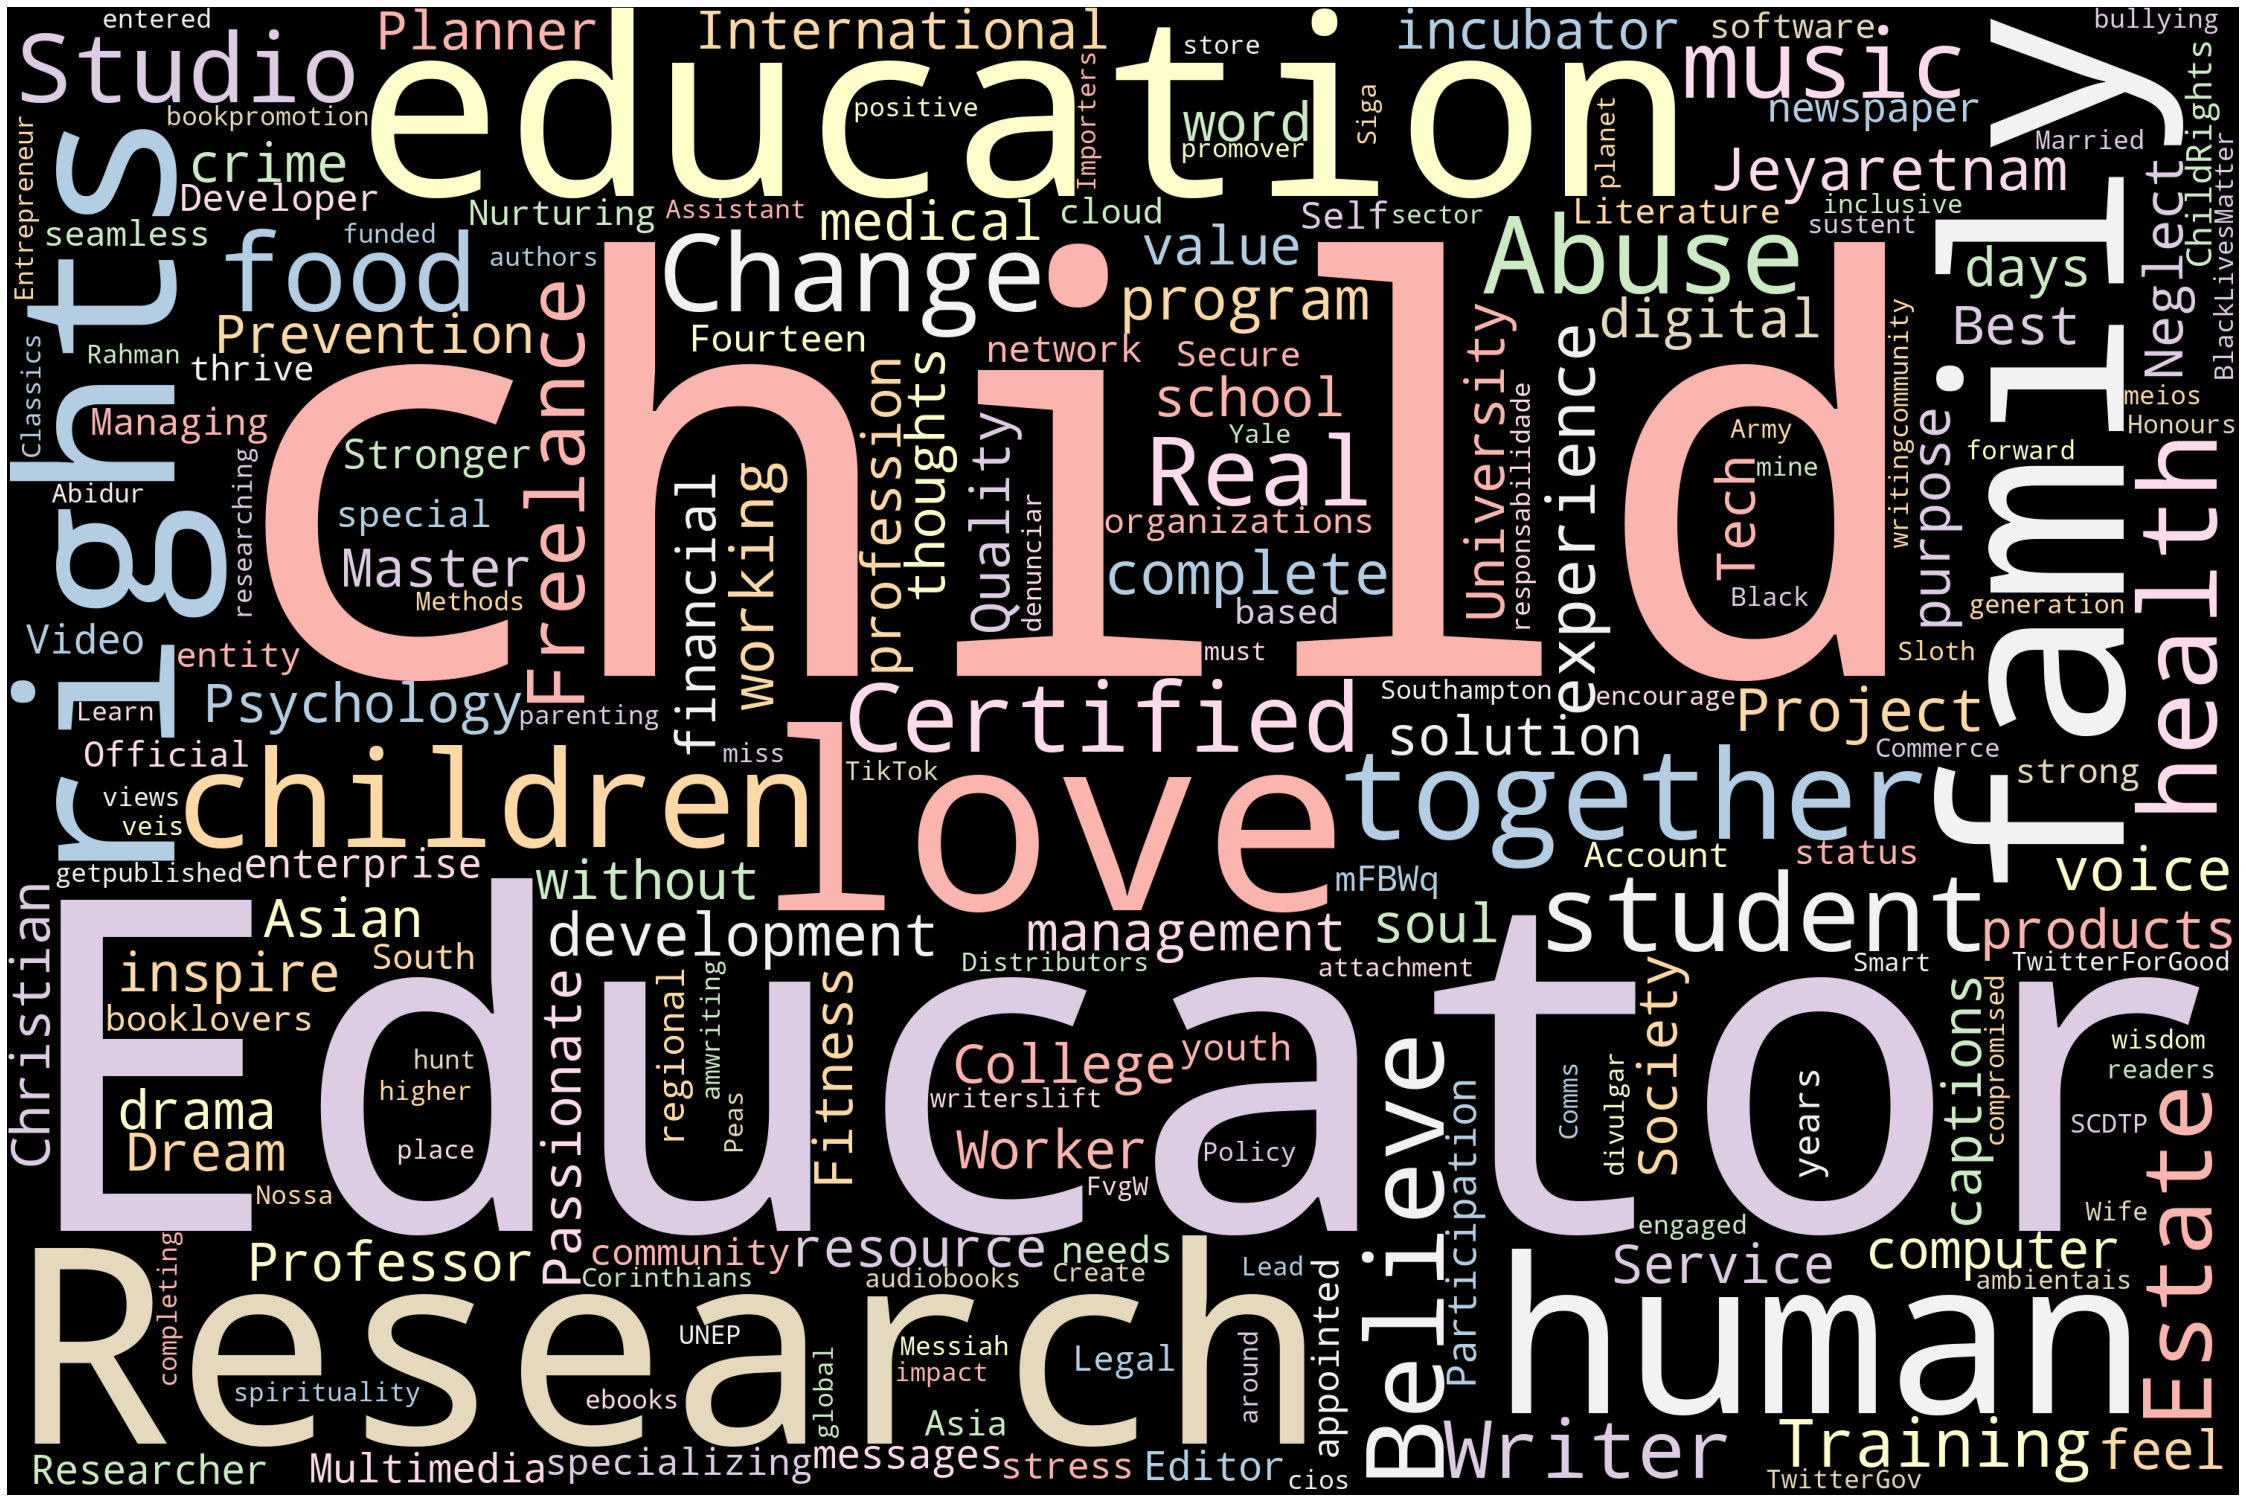

In [27]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', min_word_length=4, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [34]:
# import .csv
df_all = pd.read_csv("twitter_followers_followers_cleaned_bio.csv", index_col=0)

In [33]:
text_all = " ".join(bio for bio in df_all["bio"])
text_all = re.sub(r'==.*?==+', '', text_all)
text_all = re.sub(r'[^a-zA-Z]', ' ', text_all)
text_all = text_all.replace('\n', '')

len(text_all)

621581

In [18]:
# create a dictionary of word frequencies
text_all_dictionary = wordcloud_all.process_text(text_all)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_all_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud_all.words_

#print results
print("Top 10 Words by Frequency")
for i, word in enumerate(list(word_freq.items())[:10]):
    print(f"{i+1}. {word}")
    
print()    
print("Top 10 Words by Relative Frequency")
for i, word in enumerate(list(rel_freq.items())[:10]):
    print(f"{i+1}. {word}")

Top 10 Words by Frequency
1. ('rights', 402)
2. ('Author', 397)
3. ('children', 377)
4. ('love', 335)
5. ('Writer', 324)
6. ('child', 294)
7. ('Human', 194)
8. ('Development', 162)
9. ('people', 147)
10. ('Youth', 132)

Top 10 Words by Relative Frequency
1. ('rights', 1.0)
2. ('Author', 0.9875621890547264)
3. ('children', 0.9378109452736318)
4. ('love', 0.8333333333333334)
5. ('Writer', 0.8059701492537313)
6. ('child', 0.7313432835820896)
7. ('Human', 0.48258706467661694)
8. ('Development', 0.40298507462686567)
9. ('people', 0.3656716417910448)
10. ('Youth', 0.3283582089552239)


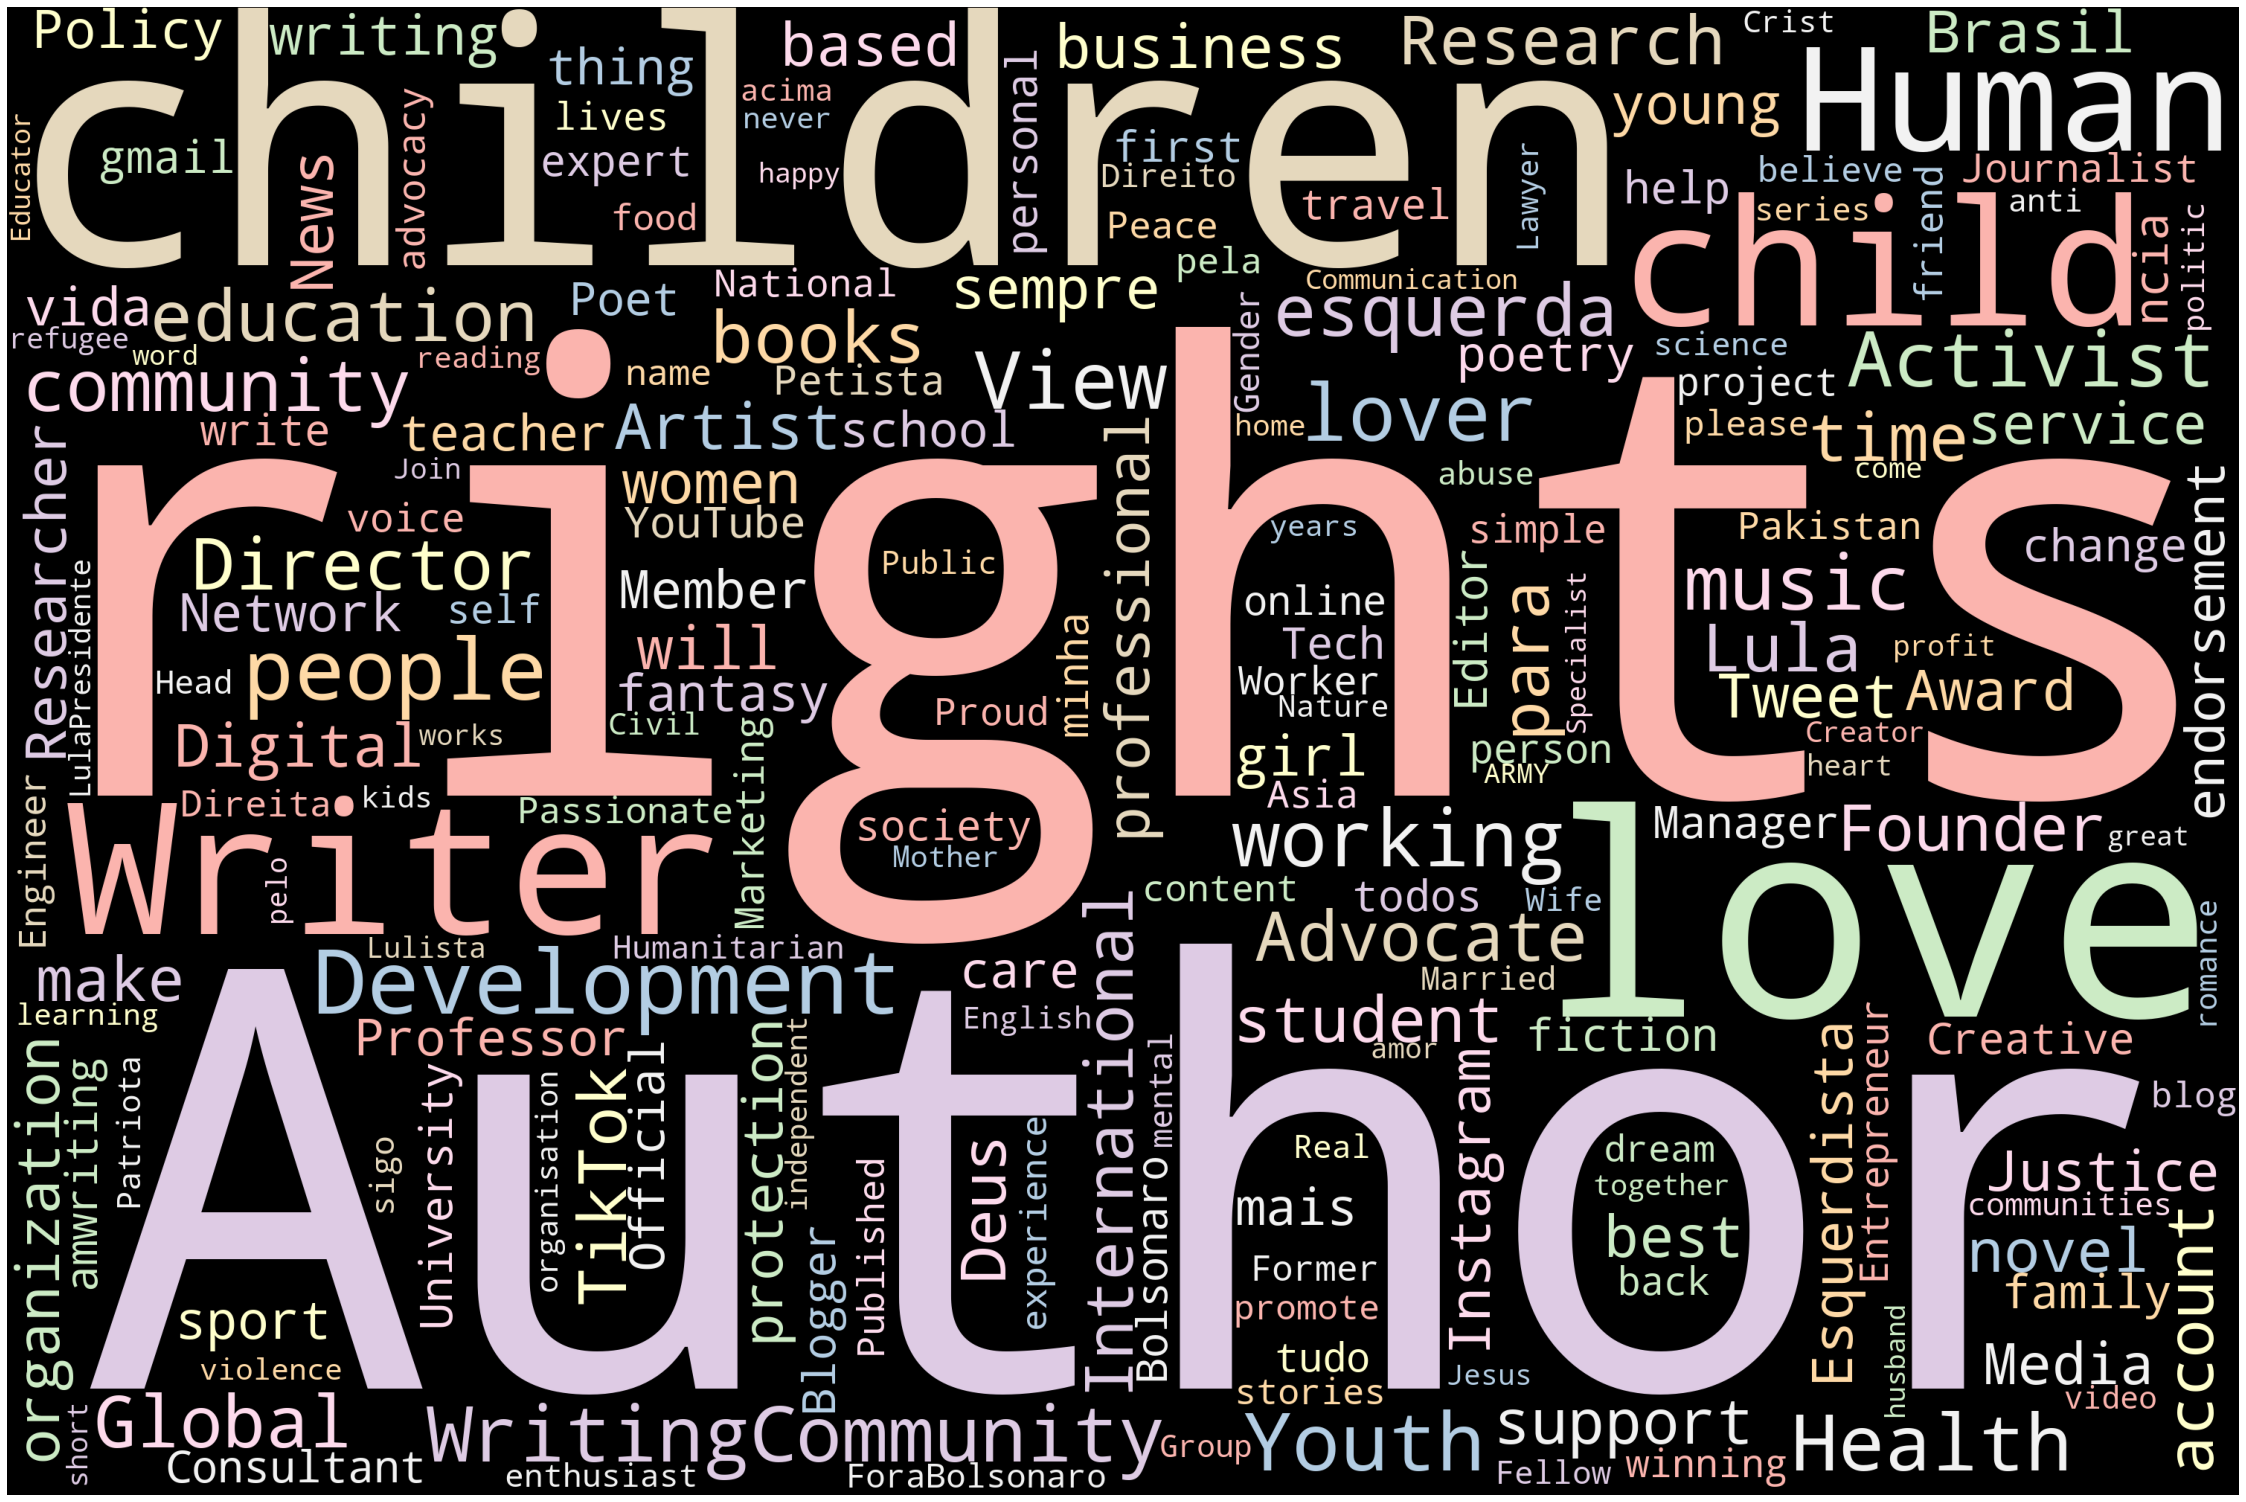

In [20]:
# Generate word cloud
wordcloud_all = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', min_word_length=4, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text_all)
# Plot
plot_cloud(wordcloud_all)

In [36]:
# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(text_all)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

# print(nouns)

all_nouns = ""

for word in nouns:
    all_nouns += word + " "

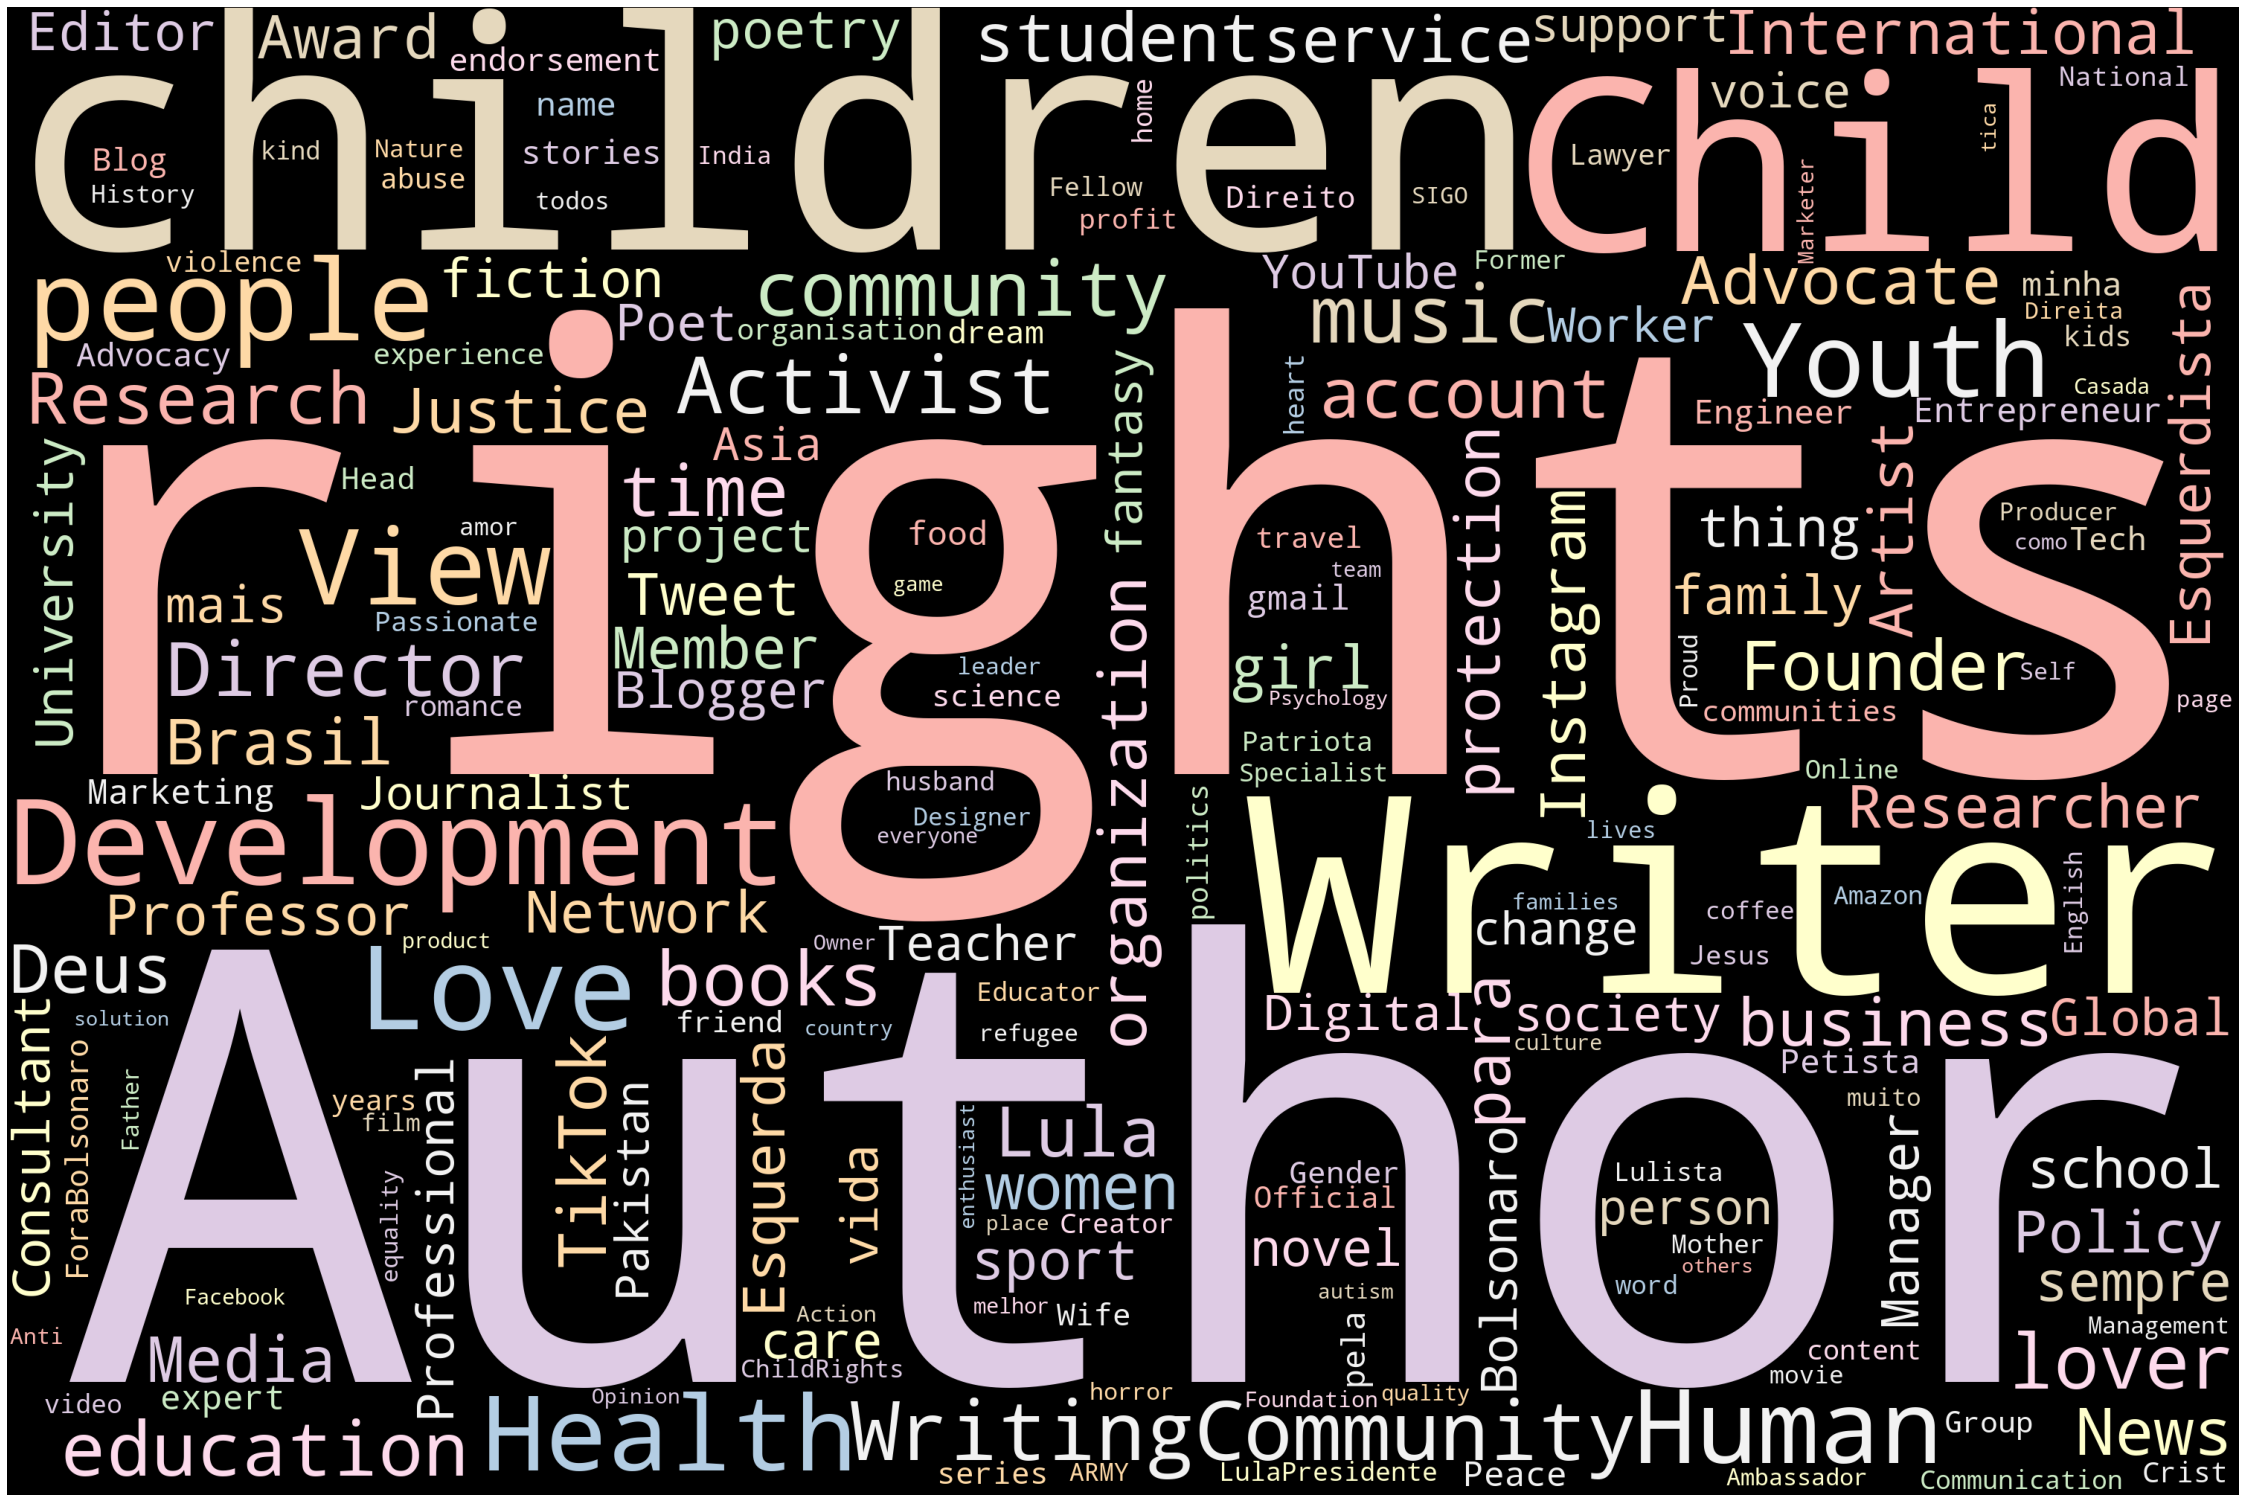

In [37]:
# Generate word cloud
noun_wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='black', min_word_length=4, colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_nouns)
# Plot
plot_cloud(noun_wordcloud) 

In [38]:
# create a dictionary of word frequencies
noun_dictionary = noun_wordcloud.process_text(all_nouns)
# sort the dictionary
word_freq={k: v for k, v in sorted(noun_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=noun_wordcloud.words_

#print results
print("Top 10 Words by Frequency")
for i, word in enumerate(list(word_freq.items())[:10]):
    print(f"{i+1}. {word}")
    
print()    
print("Top 10 Words by Relative Frequency")
for i, word in enumerate(list(rel_freq.items())[:10]):
    print(f"{i+1}. {word}")

Top 10 Words by Frequency
1. ('rights', 402)
2. ('Author', 388)
3. ('children', 377)
4. ('Writer', 316)
5. ('Child', 269)
6. ('Development', 162)
7. ('Love', 157)
8. ('people', 147)
9. ('View', 128)
10. ('Health', 124)

Top 10 Words by Relative Frequency
1. ('rights', 1.0)
2. ('Author', 0.9651741293532339)
3. ('children', 0.9378109452736318)
4. ('Writer', 0.7860696517412935)
5. ('Child', 0.6691542288557214)
6. ('Development', 0.40298507462686567)
7. ('Love', 0.39054726368159204)
8. ('people', 0.3656716417910448)
9. ('View', 0.31840796019900497)
10. ('Health', 0.30845771144278605)
